# Decision Tree

## 1. Problem Statement

* Dataset: https://github.com/gastonstat/CreditScoring"

The raw dataset is in the file **"CreditScoring.csv"** which contains 4455 rows and 14 columns:

<table>
<tbody>
<tr><td><b>1  Status</b></td> <td>credit status</td></tr>
<tr><td><b>2  Seniority</b></td> <td>job seniority (years)</td></tr>
<tr><td><b>3  Home</b></td> <td>type of home ownership</td></tr>
<tr><td><b>4  Time</b></td> <td>time of requested loan</td></tr>
<tr><td><b>5  Age</b></td> <td>client's age </td></tr>
<tr><td><b>6  Marital</b></td> <td>marital status </td></tr>
<tr><td><b>7  Records</b></td> <td>existance of records</td></tr>
<tr><td><b>8  Job</b></td> <td>type of job</td></tr>
<tr><td><b>9  Expenses</b></td> <td> amount of expenses</td></tr>
<tr><td><b>10 Income</b></td> <td> amount of income</td></tr>
<tr><td><b>11 Assets</b></td> <td> amount of assets</td></tr>
<tr><td><b>12 Debt</b></td> <td> amount of debt</td></tr>
<tr><td><b>13 Amount</b></td> <td> amount requested of loan</td></tr>
<tr><td><b>14 Price</b></td> <td> price of good</td></tr>
</tbody>
</table>

In this session we'll learn about decision trees and ensemble learning algorithms. The questions that we try to address this week are, "What are decision trees? How are they different from ensemble algorithms? How can we implement and fine-tune these models to make binary classification predictions?"

To be specific, we'll use credit scoring data to build a model that predicts whether a bank should lend loan to a client or not. The bank takes these decisions based on the historical record.

In the credit scoring classification problem,

- if the model returns 0, this means, the client is very likely to payback the loan and the bank will approve the loan.
- if the model returns 1, then the client is considered as a defaulter and the bank may not approval the loan.

In [62]:
# import my libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('credit_score.csv')
df.sample(5)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
1358,0,3,parents,36,31,married,yes,fixed,60,80.0,0.0,0.0,1450,1700
3387,0,8,owner,60,34,married,no,fixed,45,100.0,3500.0,0.0,1300,1300
4247,1,0,rent,60,33,married,no,partime,77,166.0,0.0,0.0,850,984
4004,0,39,owner,60,58,married,no,fixed,35,113.0,3500.0,0.0,1380,1623
1867,0,0,owner,36,35,married,no,freelance,75,190.0,4000.0,0.0,1300,2125


### Data Understanding

In [64]:
df.shape

(4454, 14)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   status     4454 non-null   int64  
 1   seniority  4454 non-null   int64  
 2   home       4454 non-null   object 
 3   time       4454 non-null   int64  
 4   age        4454 non-null   int64  
 5   marital    4454 non-null   object 
 6   records    4454 non-null   object 
 7   job        4454 non-null   object 
 8   expenses   4454 non-null   int64  
 9   income     4420 non-null   float64
 10  assets     4407 non-null   float64
 11  debt       4436 non-null   float64
 12  amount     4454 non-null   int64  
 13  price      4454 non-null   int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 487.3+ KB


In [66]:
# missing values
df.isna().sum().sort_values(ascending=False)

assets       47
income       34
debt         18
status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
amount        0
price         0
dtype: int64

In [67]:
df.debt.unique()

array([0.000e+00, 2.500e+03, 2.600e+02, 2.000e+03, 5.000e+02,       nan,
       3.300e+03, 3.000e+03, 4.500e+03, 1.000e+03, 1.200e+03, 8.000e+02,
       4.000e+03, 2.140e+04, 1.400e+03, 4.000e+02, 1.500e+03, 9.000e+03,
       1.947e+03, 9.000e+02, 2.000e+02, 1.550e+04, 1.200e+02, 9.600e+01,
       3.700e+03, 7.000e+02, 2.500e+02, 3.500e+03, 3.000e+02, 2.660e+02,
       4.200e+03, 4.800e+02, 1.000e+02, 1.700e+03, 3.600e+03, 1.300e+03,
       6.000e+02, 1.749e+03, 7.500e+02, 1.260e+03, 7.500e+01, 2.800e+03,
       7.200e+02, 3.400e+01, 2.000e+04, 4.500e+02, 1.810e+03, 4.800e+03,
       1.800e+03, 5.000e+01, 2.400e+03, 1.950e+03, 1.978e+03, 2.160e+03,
       1.440e+03, 6.000e+03, 5.000e+03, 1.000e+00, 1.900e+03, 2.900e+03,
       1.728e+03, 3.500e+02, 4.090e+03, 4.350e+02, 7.000e+03, 5.500e+02,
       2.350e+03, 3.900e+03, 1.641e+03, 9.700e+03, 3.800e+03, 5.600e+02,
       9.300e+03, 3.650e+03, 2.050e+03, 1.100e+03, 6.300e+03, 1.980e+02,
       8.500e+02, 5.750e+02, 1.600e+03, 1.620e+03, 

In [68]:
df.duplicated().sum()

2

#### Notice
- missing rows
- duplicate values exist

### Data Exploration

In [69]:
# target columns
df.status.value_counts()

status
0    3200
1    1254
Name: count, dtype: int64

<Axes: xlabel='status'>

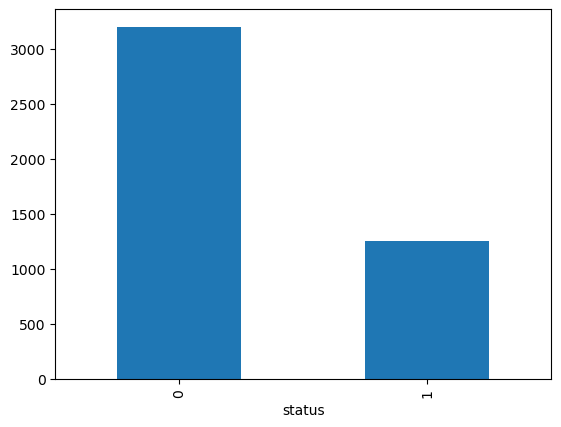

In [70]:
# target columns
df.status.value_counts().plot(kind='bar')

- Target column not balanced, there is a need for balancing it

In [71]:
# feature engineering

# Create age category
df['age_category'] = pd.cut(df['age'], bins=[0, 18, 30, 40, 50, 60], 
                           labels=['Teens', 'Youth', 'Adult', 'Mid_Age', 'Aged'])

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   status        4454 non-null   int64   
 1   seniority     4454 non-null   int64   
 2   home          4454 non-null   object  
 3   time          4454 non-null   int64   
 4   age           4454 non-null   int64   
 5   marital       4454 non-null   object  
 6   records       4454 non-null   object  
 7   job           4454 non-null   object  
 8   expenses      4454 non-null   int64   
 9   income        4420 non-null   float64 
 10  assets        4407 non-null   float64 
 11  debt          4436 non-null   float64 
 12  amount        4454 non-null   int64   
 13  price         4454 non-null   int64   
 14  age_category  4348 non-null   category
dtypes: category(1), float64(3), int64(7), object(4)
memory usage: 491.8+ KB


In [73]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [74]:
num_cols

['status',
 'seniority',
 'time',
 'age',
 'expenses',
 'income',
 'assets',
 'debt',
 'amount',
 'price']

In [75]:
cat_cols

['home', 'marital', 'records', 'job', 'age_category']

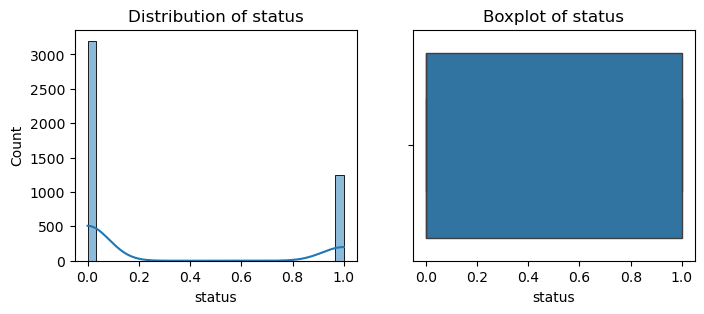

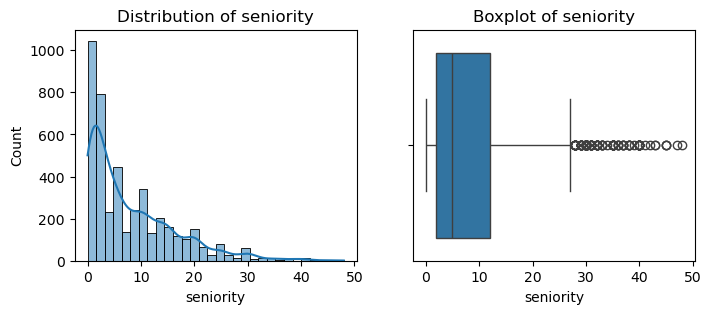

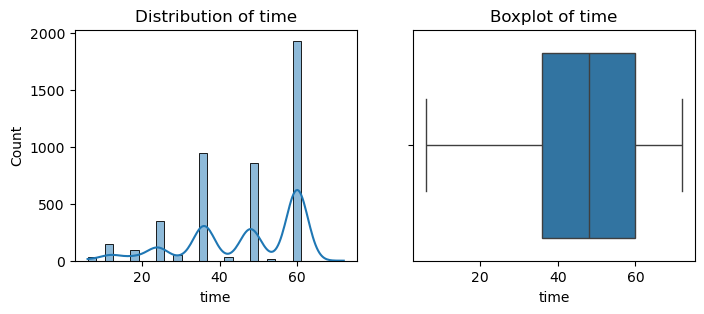

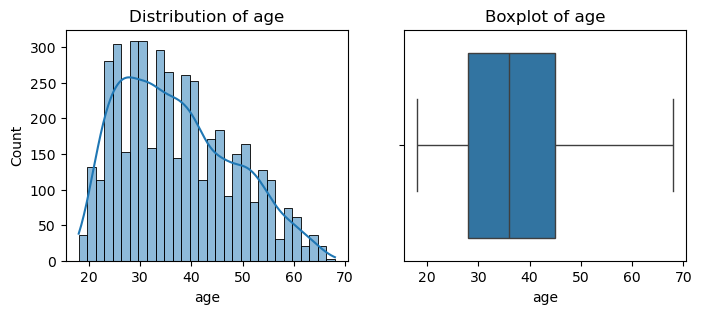

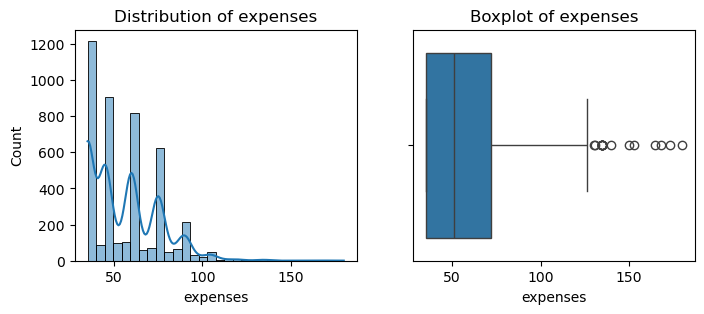

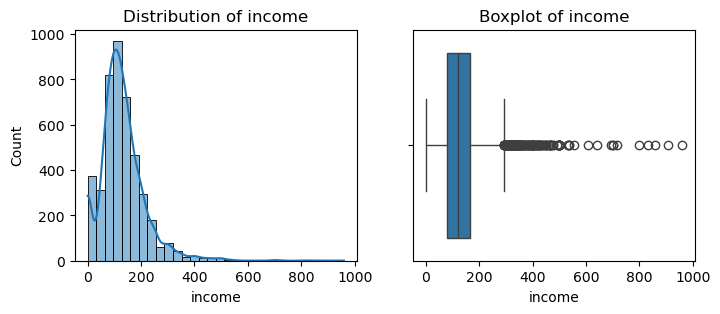

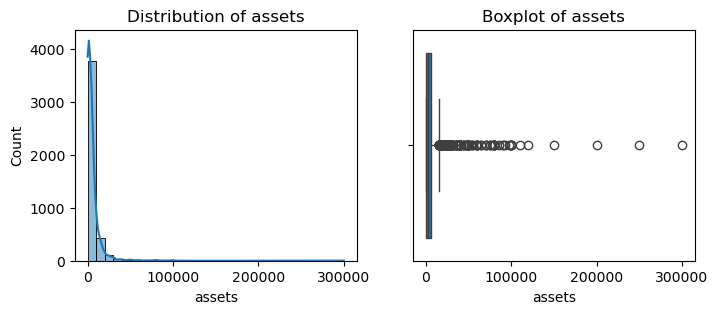

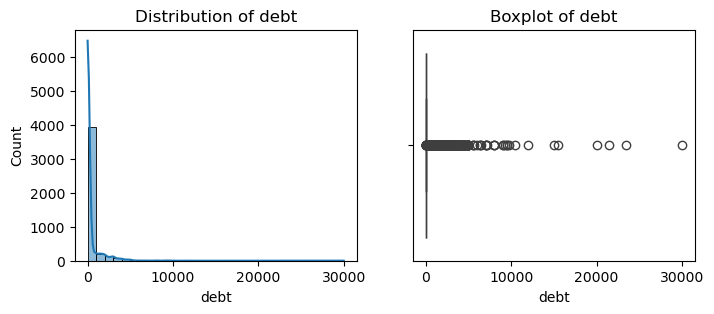

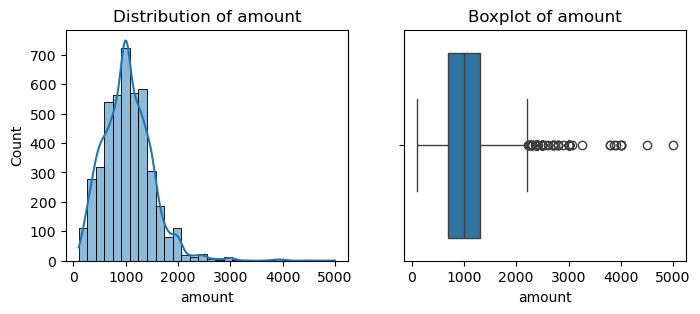

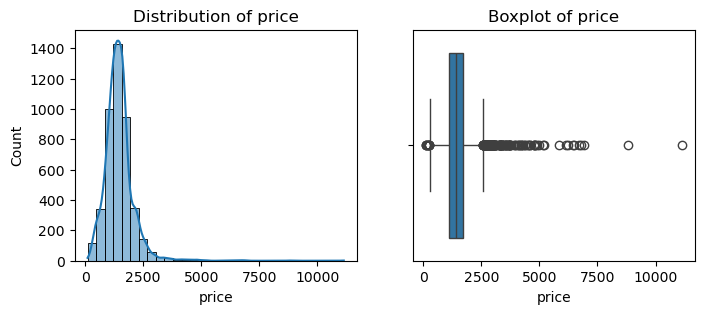

In [76]:
# create our numerical plot
for col in num_cols:
    plt.figure(figsize=(8, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

In [78]:
# calculate the skewness
skewness = df[num_cols].skew().sort_values(ascending=False)
skewness

assets       10.220199
debt          9.354038
price         3.002859
income        1.999179
seniority     1.380692
amount        1.150221
expenses      1.014862
status        0.971774
age           0.480917
time         -0.768453
dtype: float64

In [79]:
# detecting outliers using IQR
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return series[(series < lower_bound) | (series > upper_bound)]

In [80]:
# outliers from the numerical columns
for col in num_cols:
    outliers = detect_outliers(df[col])
    print(outliers)

Series([], Name: status, dtype: int64)
6       29
17      33
35      32
39      30
79      29
        ..
4328    36
4336    30
4360    40
4410    40
4426    34
Name: seniority, Length: 150, dtype: int64
Series([], Name: time, dtype: int64)
Series([], Name: age, dtype: int64)
94      140
341     173
565     135
692     130
784     135
806     135
1112    153
1211    135
1315    135
1809    131
1850    135
1969    150
1974    135
2279    165
2330    180
2436    135
3178    168
Name: expenses, dtype: int64
16      330.0
21      324.0
52      301.0
59      715.0
73      411.0
        ...  
4124    300.0
4264    700.0
4341    300.0
4363    466.0
4375    300.0
Name: income, Length: 203, dtype: float64
16      16500.0
42      50000.0
46      15900.0
78      30000.0
93      25000.0
         ...   
4385    30000.0
4402    24000.0
4410    26000.0
4419    40000.0
4440    40000.0
Name: assets, Length: 277, dtype: float64
12      2500.0
13       260.0
17      2000.0
22       500.0
30      3300.0
  

In [81]:
# deal with asset, debt and price
for col in ['assets', 'debt', 'price']:
    # logarithm + winsorization
    upper = df[col].quantile(0.95)
    df[f'{col}_log'] = np.log1p(df[col].clip(upper=upper))
    df[f'{col}_sqrt'] = np.sqrt(df[col].clip(upper=upper))

In [82]:
df.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price',
       'age_category', 'assets_log', 'assets_sqrt', 'debt_log', 'debt_sqrt',
       'price_log', 'price_sqrt'],
      dtype='object')

### Data Preparation

In [83]:
X = df.drop(['status', 'debt', 'price', 'assets', 'debt_sqrt', 'assets_log', 'price_log'], axis=1)
y = df['status']

In [84]:
# split into train and test
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42, stratify=y)

### Data Preprocessing

In [88]:
# seperate into cat and num colsa
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()

In [89]:
cat_cols

['home', 'marital', 'records', 'job']

In [90]:
num_cols

['seniority',
 'time',
 'age',
 'expenses',
 'income',
 'amount',
 'assets_sqrt',
 'debt_log',
 'price_sqrt']

In [91]:
df.home.unique()

array(['rent', 'owner', 'parents', 'private', 'other', 'ignore', 'unk'],
      dtype=object)

In [92]:
X_test.isna().sum()

seniority        0
home             0
time             0
age              0
marital          0
records          0
job              0
expenses         0
income           5
amount           0
age_category    27
assets_sqrt      9
debt_log         4
price_sqrt       0
dtype: int64

In [93]:
# fill missing value with mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [94]:
X_train[num_cols] = imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])

#### Encoder

In [95]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [96]:
encoder = OneHotEncoder(sparse_output=False).fit(df[cat_cols])

In [97]:
encoded_cols = list(encoder.get_feature_names_out(cat_cols))

In [98]:
encoded_cols

['home_ignore',
 'home_other',
 'home_owner',
 'home_parents',
 'home_private',
 'home_rent',
 'home_unk',
 'marital_divorced',
 'marital_married',
 'marital_separated',
 'marital_single',
 'marital_unk',
 'marital_widow',
 'records_no',
 'records_yes',
 'job_fixed',
 'job_freelance',
 'job_others',
 'job_partime',
 'job_unk']

In [99]:
X_train[encoded_cols] = encoder.transform(X_train[cat_cols])
X_test[encoded_cols] = encoder.transform(X_test[cat_cols])

In [100]:
# Scaling the numerical columns
scaler = StandardScaler()

In [101]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [102]:
# combine
train_processed = X_train[num_cols + encoded_cols]
test_processed = X_test[num_cols + encoded_cols]

In [103]:
train_processed.columns

Index(['seniority', 'time', 'age', 'expenses', 'income', 'amount',
       'assets_sqrt', 'debt_log', 'price_sqrt', 'home_ignore', 'home_other',
       'home_owner', 'home_parents', 'home_private', 'home_rent', 'home_unk',
       'marital_divorced', 'marital_married', 'marital_separated',
       'marital_single', 'marital_unk', 'marital_widow', 'records_no',
       'records_yes', 'job_fixed', 'job_freelance', 'job_others',
       'job_partime', 'job_unk'],
      dtype='object')

### Training and Visualizing Decision Trees
<img src="https://i.imgur.com/qSH4lqz.png" width="480">

A Decision Tree is a flowchart-like structure where:
- Internal nodes represent decisions based on features.
- Branches represent outcomes of those decisions.
- Leaf nodes represent the final prediction (class label or continuous value).
  
It splits the data into subsets based on feature values, aiming to create homogeneous subsets.



A decision tree in general parlance represents a hierarchical series of binary decisions:

<img src="https://github.com/user-attachments/assets/e2b710a0-2abe-4c35-a2d5-17d327e33318" width="600">


A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

In [104]:
['records', 'job', 'assets']

['records', 'job', 'assets']

In [105]:
df['job'].unique()

array(['freelance', 'fixed', 'partime', 'unk', 'others'], dtype=object)

In [106]:
def risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'partime':
            return 'Defaulter'
        else:
            return 'Okay'
    else:
        if client['assets'] > 6000:
            return 'Okay'
        else:
            return 'Defaulter'

In [107]:
x = df.iloc[10]

In [108]:
x

status                  0
seniority               6
home                owner
time                   48
age                    34
marital           married
records                no
job             freelance
expenses               60
income              125.0
assets             4000.0
debt                  0.0
amount               1150
price                1577
age_category        Adult
assets_log         8.2943
assets_sqrt     63.245553
debt_log              0.0
debt_sqrt             0.0
price_log        7.363914
price_sqrt      39.711459
Name: 10, dtype: object

In [109]:
risk(x)

'Defaulter'

#### Building Decision Tree Classifier

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
model = DecisionTreeClassifier(random_state=42)

In [125]:
%%time
model.fit(train_processed, y_train)

CPU times: total: 15.6 ms
Wall time: 61 ms


DecisionTreeClassifier(random_state=42)

In [126]:
from sklearn.metrics import accuracy_score

In [127]:
train_pred = model.predict(train_processed)
train_score = accuracy_score(train_pred, y_train)

# test
test_pred = model.predict(test_processed)
test_score = accuracy_score(test_pred, y_test)

In [128]:
train_score, test_score

(0.9997193376368229, 0.7182940516273849)

It appears that the model has learned the training examples perfect, and doesn't generalize well to previously unseen examples. This phenomenon is called "overfitting", and reducing overfitting is one of the most important parts of any machine learning project.

**Overfitting** is a common problem in machine learning and statistical modeling where a model learns the training data to an extent that it captures noise or random fluctuations in the data rather than the underlying patterns. In other words, an overfit model fits the training data too closely and fails to generalize well to unseen or new data. This can result in poor model performance and accuracy when applied in real-world scenarios. Overfitting can occur in various types of machine learning models, including decision trees, neural networks, support vector machines, and more.

In [129]:
from sklearn.tree import plot_tree, export_text

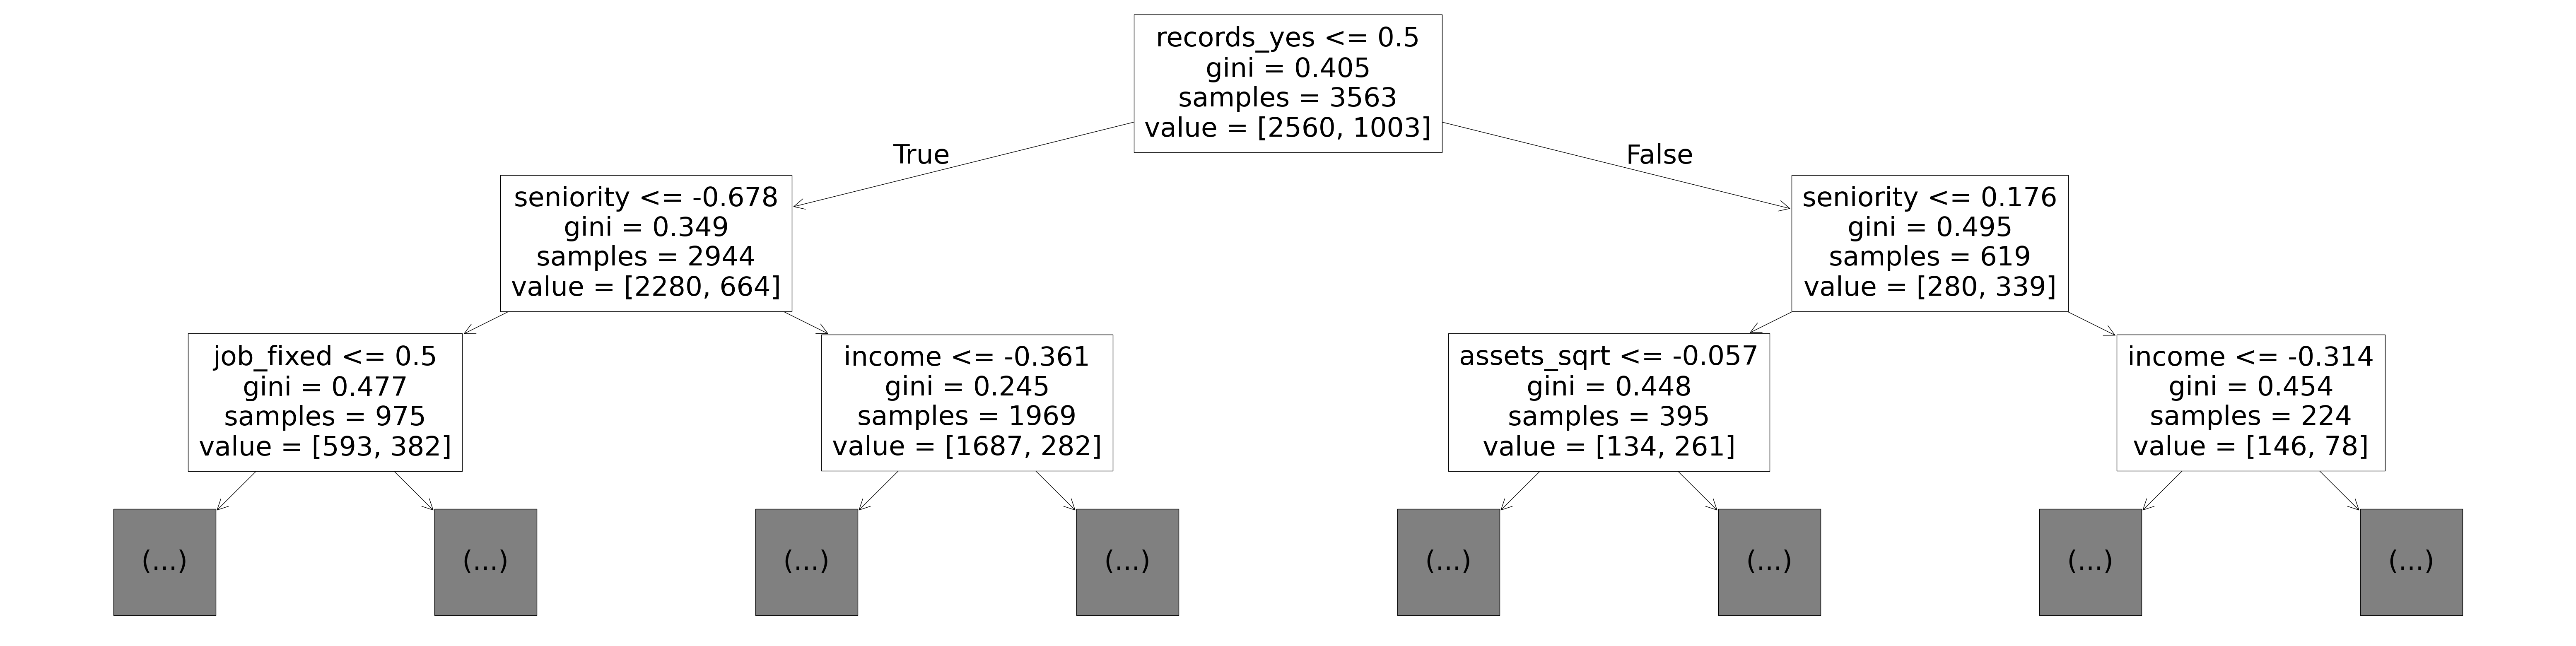

In [130]:
plt.figure(figsize=(80, 20))

plot_tree(model, feature_names=train_processed.columns.tolist(), max_depth=2);

In [131]:
model.tree_.max_depth

26

### Which Method to Choose?

- **Oversampling (e.g., SMOTE)**:  
  Use when you have a small dataset and want to increase the minority class.

- **Undersampling**:  
  Use when you have a large dataset and can afford to lose some majority class samples.

- **Class Weights**:  
  Use when you want to avoid modifying the dataset and prefer to adjust the model's behavior.

- **Ensemble Methods**:  
  Use when you want a robust solution designed for imbalanced datasets.

In [132]:
# Oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [133]:
import warnings
warnings.filterwarnings('ignore')

In [134]:
X_train_resampled, y_train_resampled = smote.fit_resample(train_processed, y_train)

In [135]:
import seaborn as sns

<Axes: xlabel='status', ylabel='count'>

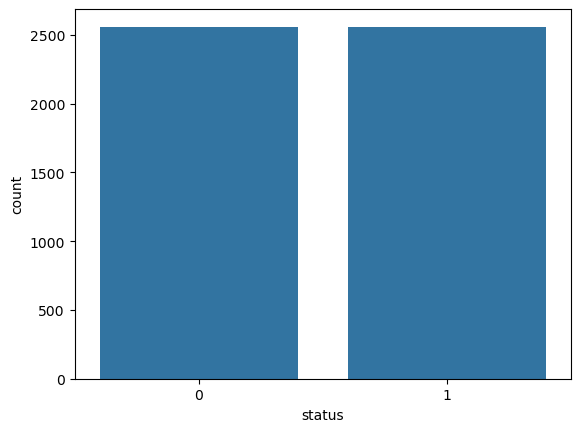

In [136]:
# visualize
sns.countplot(x=y_train_resampled)

In [139]:
%%time
model.fit(X_train_resampled, y_train_resampled)

CPU times: total: 0 ns
Wall time: 122 ms


DecisionTreeClassifier(random_state=42)

In [140]:
train_pred = model.predict(X_train_resampled)
train_score = accuracy_score(train_pred, y_train_resampled)

# test
test_pred = model.predict(test_processed)
test_score = accuracy_score(test_pred, y_test)

In [141]:
train_score, test_score

(0.9998046875, 0.6879910213243546)

Can you see how the model classifies a given input as a series of decisions? The tree is truncated here, but following any path from the root node down to a leaf will result in "Yes" or "No". Do you see how a decision tree differs from a logistic regression model?


**How a Decision Tree is Created**

Note the `gini` value in each box. This is the loss function used by the decision tree to decide which column should be used for splitting the data, and at what point the column should be split. A lower Gini index indicates a better split. A perfect split (only one class on each side) has a Gini index of 0. 

For a mathematical discussion of the Gini Index, watch this video: https://www.youtube.com/watch?v=-W0DnxQK1Eo . It has the following formula:

<img src="https://i.imgur.com/CSC0gAo.png" width="240">

Conceptually speaking, while training the models evaluates all possible splits across all possible columns and picks the best one. Then, it recursively performs an optimal split for the two portions. In practice, however, it's very inefficient to check all possible splits, so the model uses a heuristic (predefined strategy) combined with some randomization.


Let's check the depth of the tree that was created.

The situation where training accuracy is 100% while validation accuracy is lower typically indicates overfitting. Overfitting occurs when a model learns the training data too well, capturing noise and details that don't generalize to new data. Possible reasons include memorizing the training set, having a too complex model, lack of regularization, and limited data. To address overfitting, consider using regularization techniques, cross-validation, feature engineering, data augmentation, and finding a balance between model complexity and generalization. Monitoring both training and validation metrics helps identify and address overfitting during model development.

## Hyperparameter Tuning and Overfitting

As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting. The process of reducing overfitting is known as **`Regularization`**


The `DecisionTreeClassifier` accepts several arguments, some of which can be modified to reduce overfitting.

These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are _learned_ from the data. We'll explore a couple of hyperparameters:

- `max_depth`
- `max_leaf_nodes`

### `max_depth`

By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization

# Training a Random Forest

While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a random forest model. 

The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out. This idea is also commonly known as the "wisdom of the crowd":